In [28]:
import pandas as pd
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
import matplotlib.image as img
import matplotlib.pyplot as plt

In [8]:
model_3 = load_model('Models/model_3.keras')
model_4 = load_model('Models/model_4.keras')
model_5 = load_model('Models/model_5.keras')

In [21]:
def read_img(fn,size=(224,224)):
    img = Image.open(fn)
    return np.asarray(img.resize(size))

In [29]:
def test_predict(test_image,model):
    # List of class labels matching the order of class indices
    class_labels = [
        'sitting',
        'using_laptop',
        'hugging',
        'sleeping',
        'drinking',
        'clapping',
        'dancing',
        'cycling',
        'calling',
        'laughing',
        'eating',
        'fighting',
        'listening_to_music',
        'running',
        'texting'
    ]
    
    # Model prediction
    result = model.predict(np.asarray([read_img(test_image)]))
    probabilities = result[0]  # Get the probability vector
    
    # Create a pandas DataFrame for the probabilities
    prob_df = pd.DataFrame({
        'Class Index': range(len(class_labels)),
        'Label': class_labels,
        'Probability (%)': (probabilities * 100).round(2)
    }).sort_values('Probability (%)', ascending=False)
    
    # Add a rank column
    prob_df['Rank'] = range(1, len(prob_df)+1)
    
    # Get predicted class
    predicted_class = np.argmax(probabilities)
    probability = np.max(probabilities) * 100
    predicted_label = class_labels[predicted_class]
    
    # Print the probability table
    #print("\nProbability Distribution:")
    #print(prob_df.to_string(index=False))
    
    # Print top prediction
    print(f"\nTop Prediction: {predicted_label} (class {predicted_class}) with {probability:.2f}% confidence")
    
    # Display image with prediction
    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {probability:.2f}%", fontsize=10)
    plt.axis('off')
    
    # Display the table below the image
    plt.show()
    display(prob_df.style
            .background_gradient(cmap='Blues', subset=['Probability (%)'])
            .set_caption('Class Probabilities'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

Top Prediction: running (class 13) with 99.02% confidence


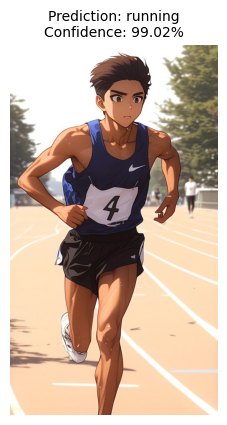

,Class Index,Label,Probability (%),Rank
13,13,running,99.019997,1
6,6,dancing,0.770000,2
7,7,cycling,0.190000,3
11,11,fighting,0.010000,4
12,12,listening_to_music,0.010000,5
0,0,sitting,0.000000,6
1,1,using_laptop,0.000000,7
2,2,hugging,0.000000,8
3,3,sleeping,0.000000,9
4,4,drinking,0.000000,10


In [32]:
test_predict("anime_images/a1.jpg",model_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

Top Prediction: dancing (class 6) with 49.23% confidence


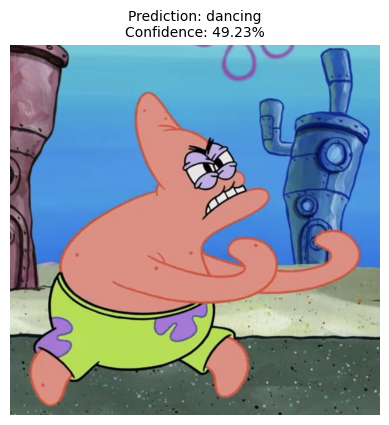

,Class Index,Label,Probability (%),Rank
6,6,dancing,49.230000,1
11,11,fighting,8.730000,2
5,5,clapping,7.490000,3
3,3,sleeping,7.320000,4
7,7,cycling,7.120000,5
0,0,sitting,4.340000,6
10,10,eating,4.160000,7
12,12,listening_to_music,2.150000,8
1,1,using_laptop,1.890000,9
13,13,running,1.830000,10


In [43]:
test_predict("anime_images/a2.jpg",model_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

Top Prediction: running (class 13) with 34.75% confidence


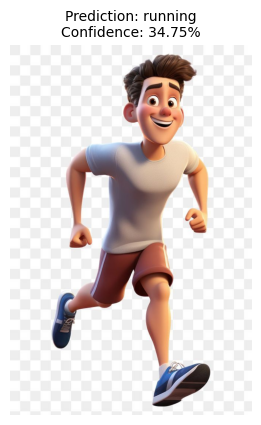

,Class Index,Label,Probability (%),Rank
13,13,running,34.750000,1
6,6,dancing,31.360001,2
9,9,laughing,8.300000,3
7,7,cycling,4.270000,4
8,8,calling,3.670000,5
5,5,clapping,3.490000,6
14,14,texting,2.510000,7
1,1,using_laptop,2.260000,8
0,0,sitting,1.880000,9
4,4,drinking,1.850000,10


In [42]:
test_predict("anime_images/a3.jpg",model_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

Top Prediction: fighting (class 11) with 33.63% confidence


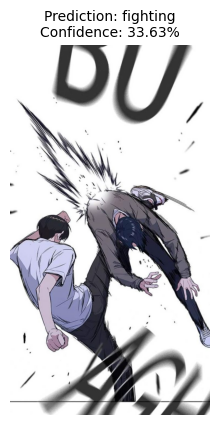

,Class Index,Label,Probability (%),Rank
11,11,fighting,33.630001,1
6,6,dancing,32.380001,2
13,13,running,14.590000,3
10,10,eating,3.140000,4
14,14,texting,2.540000,5
7,7,cycling,2.440000,6
0,0,sitting,2.080000,7
3,3,sleeping,1.860000,8
2,2,hugging,1.780000,9
5,5,clapping,1.750000,10


In [49]:
test_predict("anime_images/a4.jpg",model_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Top Prediction: sitting (class 0) with 80.03% confidence


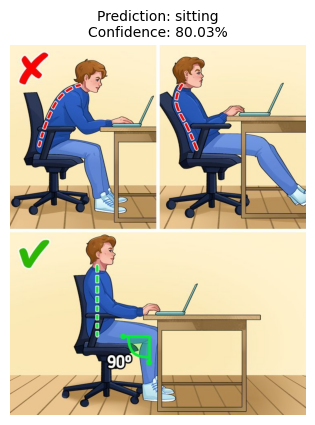

,Class Index,Label,Probability (%),Rank
0,0,sitting,80.029999,1
1,1,using_laptop,6.010000,2
6,6,dancing,2.740000,3
5,5,clapping,2.450000,4
13,13,running,2.370000,5
12,12,listening_to_music,0.950000,6
14,14,texting,0.930000,7
7,7,cycling,0.750000,8
8,8,calling,0.720000,9
3,3,sleeping,0.670000,10


In [51]:
test_predict("anime_images/a7.jpg",model_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

Top Prediction: eating (class 10) with 28.57% confidence


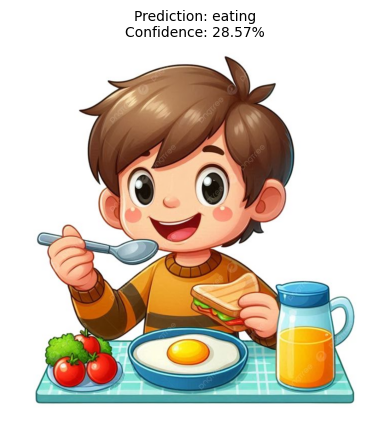

,Class Index,Label,Probability (%),Rank
10,10,eating,28.570000,1
5,5,clapping,18.350000,2
6,6,dancing,14.750000,3
8,8,calling,9.930000,4
11,11,fighting,6.150000,5
7,7,cycling,5.780000,6
12,12,listening_to_music,3.410000,7
4,4,drinking,3.100000,8
13,13,running,2.850000,9
0,0,sitting,2.270000,10


In [53]:
test_predict("anime_images/a8.jpg",model_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

Top Prediction: listening_to_music (class 12) with 96.17% confidence


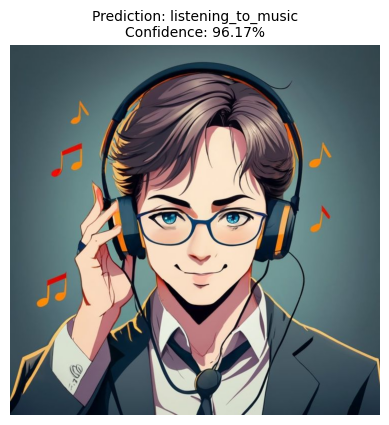

,Class Index,Label,Probability (%),Rank
12,12,listening_to_music,96.169998,1
6,6,dancing,0.850000,2
9,9,laughing,0.850000,3
7,7,cycling,0.330000,4
3,3,sleeping,0.220000,5
11,11,fighting,0.210000,6
0,0,sitting,0.200000,7
5,5,clapping,0.200000,8
8,8,calling,0.200000,9
10,10,eating,0.200000,10


In [56]:
test_predict("anime_images/a9.jpg",model_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

Top Prediction: listening_to_music (class 12) with 34.36% confidence


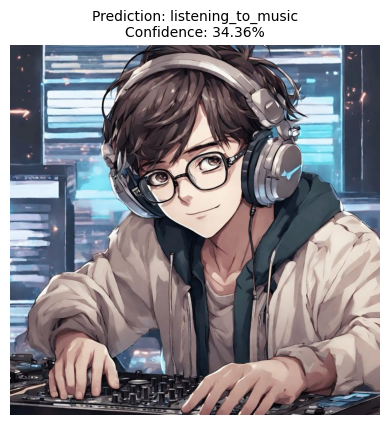

,Class Index,Label,Probability (%),Rank
12,12,listening_to_music,34.360001,1
4,4,drinking,14.070000,2
2,2,hugging,11.880000,3
9,9,laughing,10.440000,4
11,11,fighting,6.700000,5
8,8,calling,4.830000,6
10,10,eating,2.980000,7
6,6,dancing,2.620000,8
7,7,cycling,2.590000,9
5,5,clapping,2.190000,10


In [57]:
test_predict("anime_images/a10.jpg",model_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

Top Prediction: dancing (class 6) with 60.37% confidence


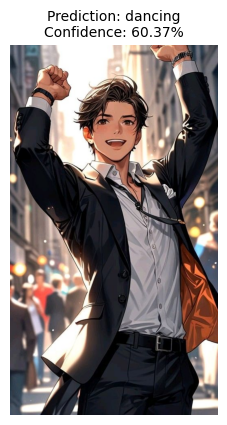

,Class Index,Label,Probability (%),Rank
6,6,dancing,60.369999,1
12,12,listening_to_music,11.080000,2
11,11,fighting,7.430000,3
7,7,cycling,5.800000,4
3,3,sleeping,4.040000,5
9,9,laughing,2.380000,6
10,10,eating,1.990000,7
4,4,drinking,1.580000,8
2,2,hugging,1.420000,9
14,14,texting,1.180000,10


In [58]:
test_predict("anime_images/a11.jpg",model_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

Top Prediction: dancing (class 6) with 97.39% confidence


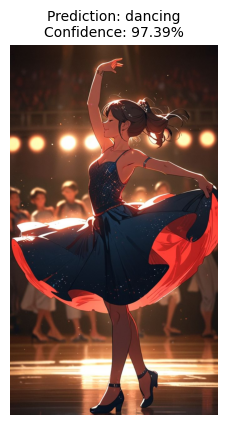

,Class Index,Label,Probability (%),Rank
6,6,dancing,97.389999,1
2,2,hugging,0.450000,2
4,4,drinking,0.380000,3
11,11,fighting,0.270000,4
12,12,listening_to_music,0.250000,5
14,14,texting,0.200000,6
1,1,using_laptop,0.180000,7
3,3,sleeping,0.150000,8
5,5,clapping,0.130000,9
0,0,sitting,0.120000,10


In [59]:
test_predict("anime_images/a12.jpg",model_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

Top Prediction: cycling (class 7) with 96.39% confidence


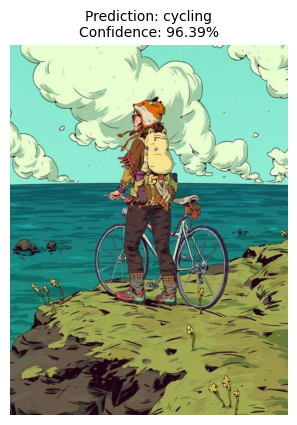

,Class Index,Label,Probability (%),Rank
7,7,cycling,96.389999,1
5,5,clapping,0.350000,2
6,6,dancing,0.340000,3
9,9,laughing,0.340000,4
1,1,using_laptop,0.310000,5
10,10,eating,0.300000,6
11,11,fighting,0.290000,7
3,3,sleeping,0.260000,8
14,14,texting,0.260000,9
8,8,calling,0.250000,10


In [60]:
test_predict("anime_images/a13.jpg",model_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

Top Prediction: cycling (class 7) with 93.45% confidence


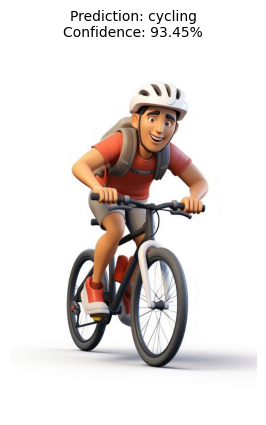

,Class Index,Label,Probability (%),Rank
7,7,cycling,93.449997,1
5,5,clapping,0.990000,2
1,1,using_laptop,0.760000,3
6,6,dancing,0.710000,4
14,14,texting,0.620000,5
8,8,calling,0.510000,6
9,9,laughing,0.510000,7
0,0,sitting,0.480000,8
10,10,eating,0.400000,9
12,12,listening_to_music,0.360000,10


In [61]:
test_predict("anime_images/a14.jpg",model_5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

Top Prediction: sleeping (class 3) with 85.58% confidence


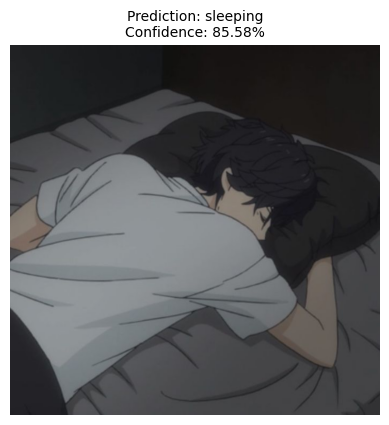

,Class Index,Label,Probability (%),Rank
3,3,sleeping,85.580002,1
6,6,dancing,5.450000,2
5,5,clapping,2.000000,3
11,11,fighting,1.250000,4
0,0,sitting,1.210000,5
14,14,texting,0.830000,6
13,13,running,0.660000,7
12,12,listening_to_music,0.510000,8
2,2,hugging,0.480000,9
7,7,cycling,0.440000,10


In [62]:
test_predict("anime_images/a15.jpg",model_5)

In [ ]:
# finish